<a href="https://colab.research.google.com/github/Adithya-b-03/Data-Analysis-miniProjects/blob/main/notebooks/colab-github-demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Google Colab with GitHub




[Google Colaboratory](http://colab.research.google.com) is designed to integrate cleanly with GitHub, allowing both loading notebooks from github and saving notebooks to github.

## Loading Public Notebooks Directly from GitHub

Colab can load public github notebooks directly, with no required authorization step.

For example, consider the notebook at this address: https://github.com/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb.

The direct colab link to this notebook is: https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb.

To generate such links in one click, you can use the [Open in Colab](https://chrome.google.com/webstore/detail/open-in-colab/iogfkhleblhcpcekbiedikdehleodpjo) Chrome extension.

## Browsing GitHub Repositories from Colab

Colab also supports special URLs that link directly to a GitHub browser for any user/organization, repository, or branch. For example:

- http://colab.research.google.com/github will give you a general github browser, where you can search for any github organization or username.
- http://colab.research.google.com/github/googlecolab/ will open the repository browser for the ``googlecolab`` organization. Replace ``googlecolab`` with any other github org or user to see their repositories.
- http://colab.research.google.com/github/googlecolab/colabtools/ will let you browse the main branch of the ``colabtools`` repository within the ``googlecolab`` organization. Substitute any user/org and repository to see its contents.
- http://colab.research.google.com/github/googlecolab/colabtools/blob/master will let you browse ``master`` branch of the ``colabtools`` repository within the ``googlecolab`` organization. (don't forget the ``blob`` here!) You can specify any valid branch for any valid repository.

## Loading Private Notebooks

Loading a notebook from a private GitHub repository is possible, but requires an additional step to allow Colab to access your files.
Do the following:

1. Navigate to http://colab.research.google.com/github.
2. Click the "Include Private Repos" checkbox.
3. In the popup window, sign-in to your Github account and authorize Colab to read the private files.
4. Your private repositories and notebooks will now be available via the github navigation pane.

## Saving Notebooks To GitHub or Drive

Any time you open a GitHub hosted notebook in Colab, it opens a new editable view of the notebook. You can run and modify the notebook without worrying about overwriting the source.

If you would like to save your changes from within Colab, you can use the File menu to save the modified notebook either to Google Drive or back to GitHub. Choose **File→Save a copy in Drive** or **File→Save a copy to GitHub** and follow the resulting prompts. To save a Colab notebook to GitHub requires giving Colab permission to push the commit to your repository.

## Open In Colab Badge

Anybody can open a copy of any github-hosted notebook within Colab. To make it easier to give people access to live views of GitHub-hosted notebooks,
colab provides a [shields.io](http://shields.io/)-style badge, which appears as follows:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

The markdown for the above badge is the following:

```markdown
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
```

The HTML equivalent is:

```HTML
<a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
```

Remember to replace the notebook URL in this template with the notebook you want to link to.

In [6]:
import requests
import pandas as pd

In [16]:
import requests

url = "https://api.coingecko.com/api/v3/ping"
headers = {"User-Agent": "Mozilla/5.0"}

response = requests.get(url, headers=headers)
print(response.status_code)
print(response.text)


200
{"gecko_says":"(V3) To the Moon!"}


In [19]:
import requests
from datetime import datetime

def get_eth_prices(days=7):
    url = "https://api.coingecko.com/api/v3/coins/ethereum/market_chart"
    params = {
        "vs_currency": "usd",
        "days": days
    }
    response = requests.get(url, params=params)
    response.raise_for_status()
    data = response.json()

    prices = data.get("prices", [])
    return [
        {
            "datetime": datetime.fromtimestamp(ts / 1000),
            "ClosePrice": price
        }
        for ts, price in prices
    ]



In [20]:
eth_data = get_eth_prices()
eth_df = pd.DataFrame(eth_data)
eth_df.set_index("datetime", inplace=True)


In [21]:
print(eth_df.head())
print(eth_df.info())

                          ClosePrice
datetime                            
2025-07-20 11:03:24.423  3702.290815
2025-07-20 12:03:50.064  3752.815981
2025-07-20 13:04:02.640  3742.216929
2025-07-20 14:03:51.063  3748.479025
2025-07-20 15:00:38.333  3752.163177
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 169 entries, 2025-07-20 11:03:24.423000 to 2025-07-27 11:09:47
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ClosePrice  169 non-null    float64
dtypes: float64(1)
memory usage: 2.6 KB
None


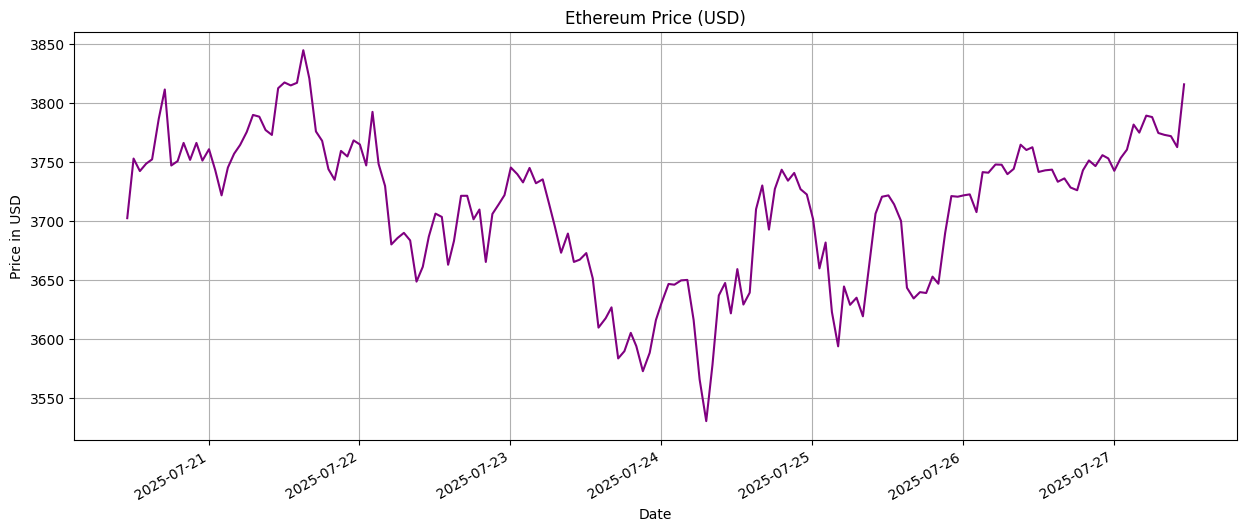

In [23]:
import matplotlib.pyplot as plt
eth_df['ClosePrice'].plot(title='Ethereum Price (USD)', figsize=(15, 6), color='purple')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.grid(True)
plt.show()

In [24]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.io import output_notebook
output_notebook()
p = figure(x_axis_type="datetime", title="Ethereum Price (Interactive)", width=800)
p.grid.grid_line_alpha = 0.3
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Price (USD)'

p.line(eth_df.index, eth_df['ClosePrice'], color='green', legend_label='Ethereum')
p.legend.location = "top_left"
show(p)